In [1]:
import numpy as np
from scipy.io import loadmat
from cartopy import config
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# 1
One reason it is important to correctly determine the amount of anthropogenic $CO_2$ in the ocean is so that we can predict future warming.  Current trends in ocean anthropogenic carbon uptake can help predict future carbon uptake.  If we combine this with future emissions scenarios we can more accurately predict climate warming.

A second reason it is important to correctly determine the amount of anthropogenic $CO_2$ in the ocean is so that we can reasonanly estimate the land sink of $CO_2$.  We have accurate measurements of fossil fuel emissions and atmospheric storage of carbon.  If we correctly determine the ocean sink of $CO_2$ then we can obtain a more accurate estimate of how the land carbon sink. 

# 2
$O_2$ and $CO_2$ are coupled during the burning of fossil fuels and are exchanged independendtly between the atmosphere and ocean. The atmospheric oxygen method uses historical measurements of atmospheric oxygen and carbon dioxide to estimate the ocean uptake of anthropogenic $CO_2$ Figure 10.2.10 in the textbook shows a plot of $O_2$ vs $CO_2$ atmospheric concentrations from 1990-2000. One trend line is plotted showing the observed atmospheric concentrations and a second trend line shows the expected concentrations based on fossil fuel burning. The difference in the expected values and observed values in 2000 are due to the ocean and land uptakes of carbon. Oceanic uptake of carbon results in no change in atmospheric oxygen concentrations. We can use stoichiometric relationships to estimate how much oxygen is released by the land uptake of carbon and fit the land uptake and ocean uptake vectors to account for the differences in the observed and expected trend lines

Assumptions: changes in atmospheric oxygen are only the result of burning fossil fuels, oceanic carbon uptake results in no change in atmospheric oxygen, natural carbon and oxygen cycles have remained in steady state

# 3
The equation below is used to determine the change in oceanic DIC that occured during these 10 years:

$\frac{\delta DIC}{\delta t} = \frac{1}{\gamma_{DIC}} \frac{DIC}{pCO_2^{oc}} \frac{\delta pCO_2^{atm}}{\delta t}$

where $\gamma_{DIC}$ is the buffer factor (10), $pCO_2^{oc}$ is the oceanic partial pressure of $CO_2$ (355 $\mu atm$), DIC is the concentration of dissolved inorganic carbon (2030 $\mu mol/kg$), and $\frac{\delta pCO_2^{atm}}{\delta t}$ is the rate of chage in atmospheric $CO_2$ partial pressure (2 ppm/yr * 1atm = 2 $\mu atm/yr$)

In [6]:
gamma_dic = 10
pCO2 = 355 #partial pressure CO2 in ocean (micro-atm)
change_pCO2 = 2 #change in oceanic partial pressure CO2 (1 micro-atm/yr)
DIC = 2030 #(micro-mol/kg)

change_DIC  = (1/gamma_dic) *(DIC/pCO2)*(change_pCO2) *10

print(f'The change in ocean DIC that occured in this 10 year period is {change_DIC:0.3f} micro-mol/kg')

The change in ocean DIC that occured in this 10 year period is 11.437 micro-mol/kg


# 4
The column inventory represents the vertically integrated concentration of anthropogenic $CO_2$ in the ocean. The column inventory is high in the North Atlantic and mid-latitude Southern Ocean because deep water masses are formed at these locations.  This means that water is subducted at these locations and any anthropogenic carbon that fluxes from the atmosphere to the surface ocean is transported deeper in the ocean.  Ocean anthropogenic carbon then follows the overturning ocean circulation.  More anthropogenic carbon can flux into the ocean in the North Atlantic and mid-latitude Southern Ocean because of the subduction occuring at these locations, allowing for a build up of anthropogenic $CO_2$.

# 5
When we calculate f, we take into account the depth of penetration through the mass of the ocean, $m_{oc}$.  The equation for f is:

$f = (1 + \frac{N_{tot}^{atm} * \gamma_{DIC} * pCO_2^{oc}}{DIC*P_{tot}^{atm} * m^{oc}})^{-1}$

If we know f to be 0.3, we can solve for the mass of the ocean using known values for the rest of the variables.  Once we have obtained the ocean mass we can determine the $CO_2$ penetration ocean volume using the density of the ocean (assuming it is constant for the upper ocean). If we assume that the ocean covers 70% of the Earth's surface area and is a constant depth, we can calculate the depth of anthropogenic carbon penetration using the volume and Earth's surface area.  The equation to get from ocean mass to carbon penetration depth is below:

$depth = \frac{m_{oc}}{\rho*0.7*SA_{earth}}$

# 6

$f = (1 + \frac{N_{tot}^{atm} * \gamma_{DIC} * pCO_2^{oc}}{DIC*P_{tot}^{atm} * m^{oc}})^{-1}$

$\gamma_{DIC} = \frac{\delta ln pCO_2}{\delta ln DIC} \approx \frac{3Alk*DIC - 2DIC^2}{(2DIC - Alk)(Alk - DIC)}$

If the DIC in the ocean increases then the buffer factor ($\gamma_{DIC}$) will increase. The increase in the buffer factor will lead to a corresponding decrease in fractional uptake of anthropogenic carbon by the ocean.


In [22]:
mass_oc = 1.35*10**21 #mass of ocean (kg)
N_atm = 1.773*10**20 #moles in atmosphere (mol)
p_atm = 1 #atmospheric pressure (atm)

### --- b --- ###
DIC = 1983*10**-6 # surface ocean DIC (mol/kg)
Alk = 2308*10**-6 # surface ocean alkilinity (mol/kg)
pCO2 = 280*10**-6 # surface ocean partial pressure of CO2 (atm)

gamma_dic = (3*Alk*DIC - 2*DIC**2)/((2*DIC - Alk)*(Alk - DIC))
f1 = (1+(N_atm*gamma_dic*pCO2)/(DIC*p_atm*mass_oc))**-1
print(f'b: The oceanic uptake fraction for the pre-industrial mean ocean is {f1:0.3f}')

### --- c --- ###
DIC2 = DIC+100*10**-6 # surface ocean DIC (micro-mol/kg)

gamma_dic2 = (3*Alk*DIC2 - 2*DIC2**2)/((2*DIC2 - Alk)*(Alk - DIC2))
pCO2_2 = np.exp(gamma_dic2*(np.log(DIC2)-np.log(DIC)) + np.log(pCO2))
f2 = (1+(N_atm*gamma_dic2*pCO2_2)/(DIC2*p_atm*mass_oc))**-1
print(f'c: The oceanic uptake fraction for the pre-industrial mean ocean is {f2:0.3f}')

b: The oceanic uptake fraction for the pre-industrial mean ocean is 0.832
c: The oceanic uptake fraction for the pre-industrial mean ocean is 0.677


# 7

In [2]:
co2_flux_pi_2005 = np.transpose(loadmat('co2_flux_pi_2005.mat')['co2_flux_pi_2005'])
co2_flux_contemp_2005 = np.transpose(loadmat('co2_flux_contemp_2005.mat')['co2_flux_contemp_2005'])
model_lat = loadmat('model_lat.mat')['model_lat']
model_lon = loadmat('model_lon.mat')['model_lon'] 
model_area = loadmat('model_area.mat')['model_area']/10000 #m

co2_flux_anthro_2005 = co2_flux_contemp_2005 - co2_flux_pi_2005

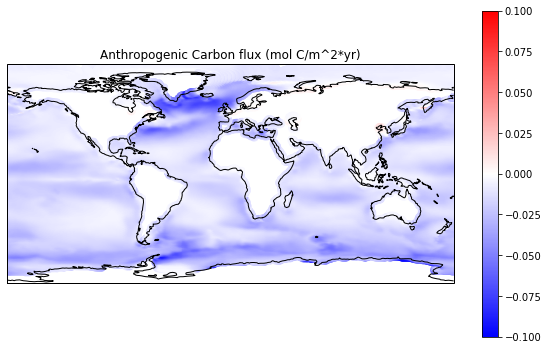

In [3]:
plt.figure(figsize=(10,6))

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Anthropogenic Carbon flux (mol C/m^2*yr)')
ax.coastlines()

plt.scatter(model_lon, model_lat, c =co2_flux_anthro_2005, vmin = -3, vmax = 3,cmap = 'bwr',transform=ccrs.PlateCarree())
plt.xlabel('longitude')
plt.ylabel('latitude')
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_array(co2_flux_anthro_2005)
m.set_clim(-3, 3)
plt.colorbar(m)
plt.show()



In the plot above we see that the anthropogenic carbon flux is directed into the ocean everywhere across the globe.  The magnitude of the flux is the largest in the North Atlantic and Southern Ocean. This makes sense because this is were deep water is formed, meaning that ocean water downwells in these regions, carrying anthropogenic carbon deeper into the ocean and allowing more Carbon to flux from the atmosphere to the ocean. The magnitude of the flux is the smallest in the Pacific ocean.  This is because the Pacific Ocean is at the end of the meridional overturning circulation which means that it takes a very long time for anthropogenic carbon to reach the Pacific ocean via deep water currents and that less anthropogenic carbon can flux into the ocean in this region.

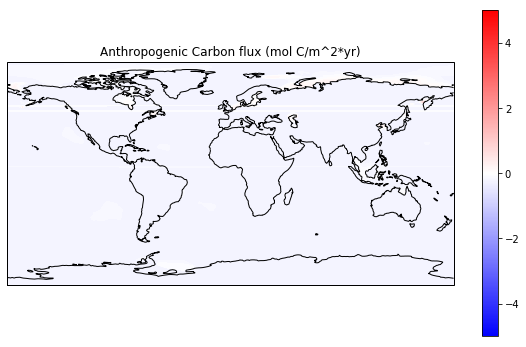

In [27]:
#I had to do a scatter plot here because when I tried to do it with contourf it was really messed up (see plot below)
plt.figure(figsize=(10,6))

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Anthropogenic Carbon flux (mol C/m^2*yr)')
ax.coastlines()

plt.contourf(model_lon, model_lat, co2_flux_anthro_2005, 60, vmin = -5, vmax = 5,cmap = 'bwr',transform=ccrs.PlateCarree())
plt.xlabel('longitude')
plt.ylabel('latitude')
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_array(co2_flux_anthro_2005)
m.set_clim(-5, 5)
plt.colorbar(m)
plt.show()


In [29]:
int_anthro_2005  = np.nansum(np.nansum((co2_flux_contemp_2005 - co2_flux_pi_2005) * model_area))*12*10**-15
print(f'The globally-integrated flux of anthropogenic CO2 across the air-sea interface in 2005 was {int_anthro_2005:0.4f} Pg C/yr')

The globally-integrated flux of anthropogenic CO2 across the air-sea interface in 2005 was -2.1993 Pg C/yr


Wanninkhof et al (2013) states that the best estimate of anthropogenic carbon uptake for the period of 1990-2009 based on multiple approaches is −2.0 Pg C yr −1.  This is slightly less than the value I calculated for 2005.  We could expect the globally integrated anthropogenic carbon uptake for 2005 to be slightly higher than the average for 1990-2009 because 2005 is at the upper end of this range